In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
#!pip install plotly


In [32]:
#!pip install cufflinks

In [33]:
#!pip install wordcloud

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re
from sklearn.feature_extraction.text import CountVectorizer
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks
import nltk
nltk.download('wordnet')



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
data = pd.read_csv("./Dataset/cyberbullying_tweets.csv")
data.head(10)

tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying
5  @Raja5aab @Quickieleaks Yes, the test of god i...  not_cyberbullying
6  Itu sekolah ya bukan tempat bully! Ga jauh kay...  not_cyberbullying
7  Karma. I hope it bites Kat on the butt. She is...  not_cyberbullying
8       @stockputout everything but mostly my priest  not_cyberbullying
9  Rebecca Black Drops Out of School Due to Bully...  not_cyberbullying

In [36]:
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

from wordcloud import STOPWORDS
STOPWORDS.update(['rt', 'mkr', 'didn', 'bc', 'n', 'm', 'im', 'll', 'y', 've', 'u', 'ur', 'don', 't', 's'])

def lower(text):
    return text.lower()

def remove_twitter(text):
    return re.sub(TEXT_CLEANING_RE, ' ', text)

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

def clean_text(text):
    text = lower(text)
    text = remove_twitter(text)
    text = remove_stopwords(text)
    return text

In [37]:
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = STOPWORDS).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [38]:
data['tweet_text']=data['tweet_text'].apply(clean_text)

In [39]:
from nltk.stem import WordNetLemmatizer

lematizer=WordNetLemmatizer()

def lemmatizer_words(text):
    return " ".join([lematizer.lemmatize(word) for word in text.split()])

data['tweet_text']=data['tweet_text'].apply(lambda text: lemmatizer_words(text))

In [40]:
data.cyberbullying_type.unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

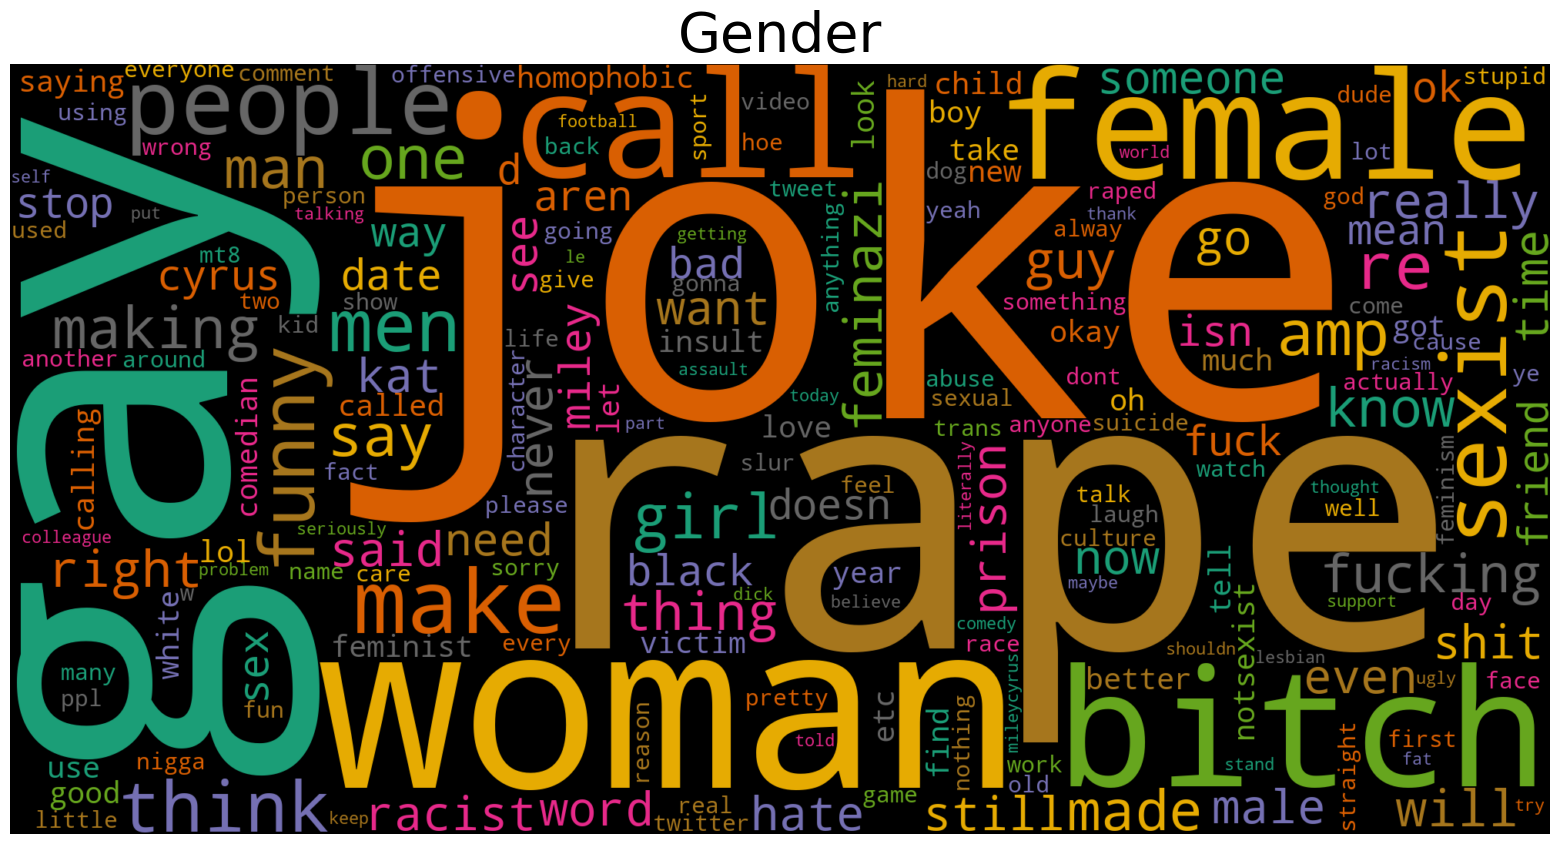

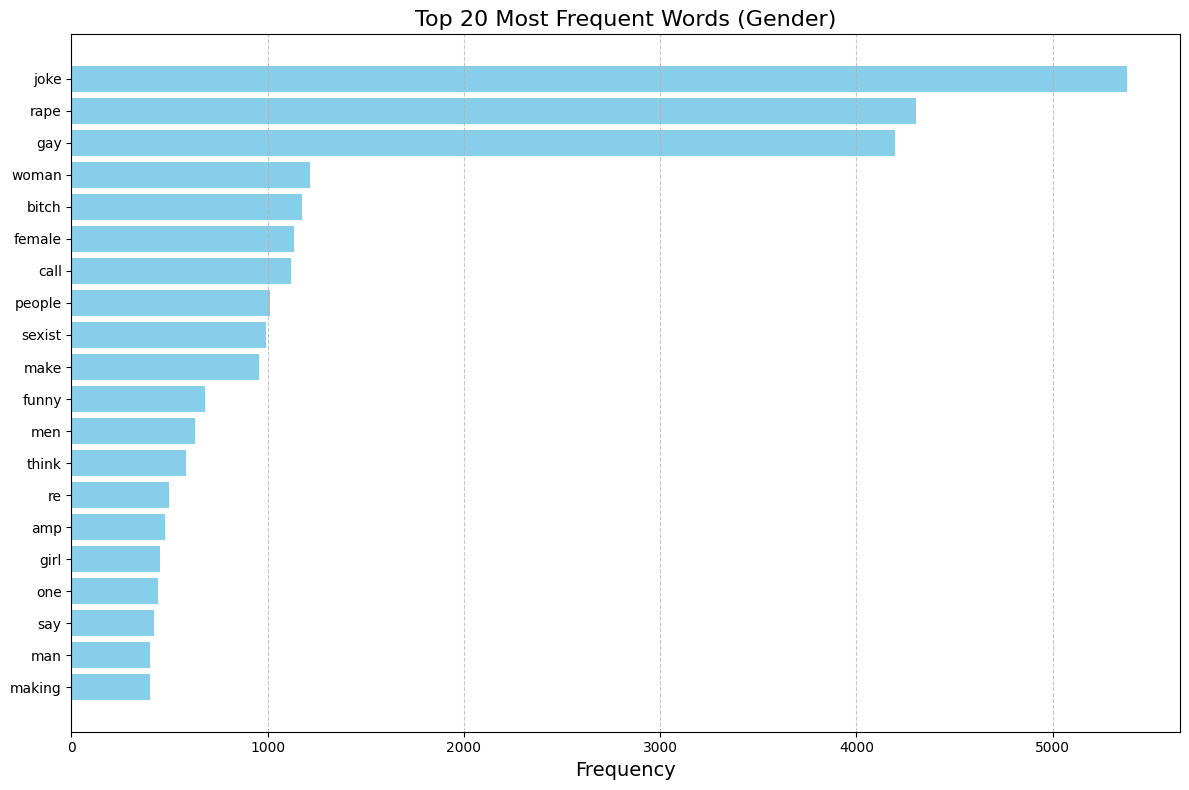

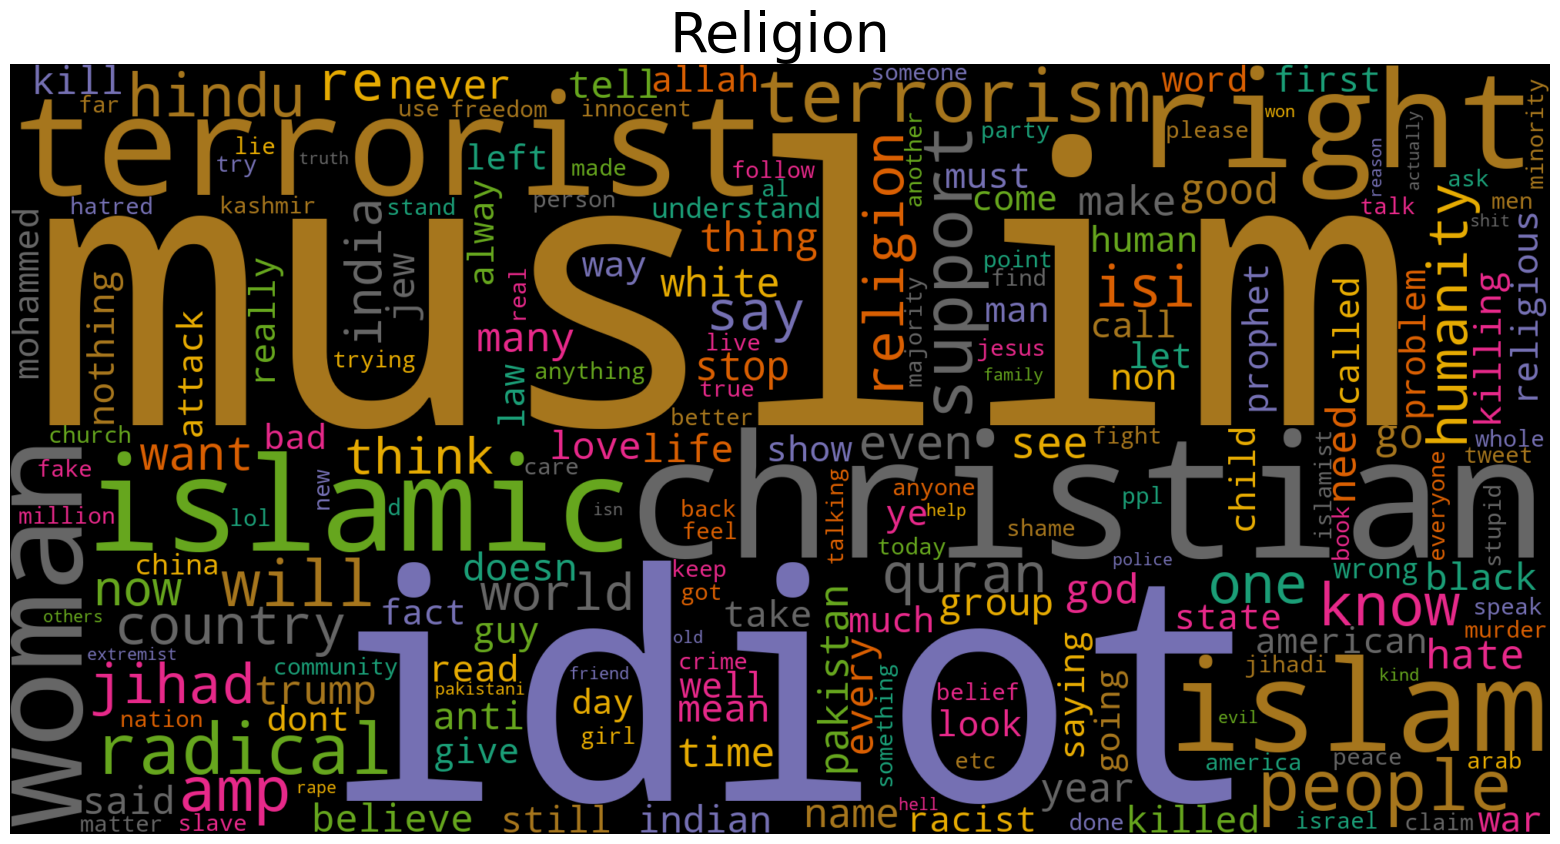

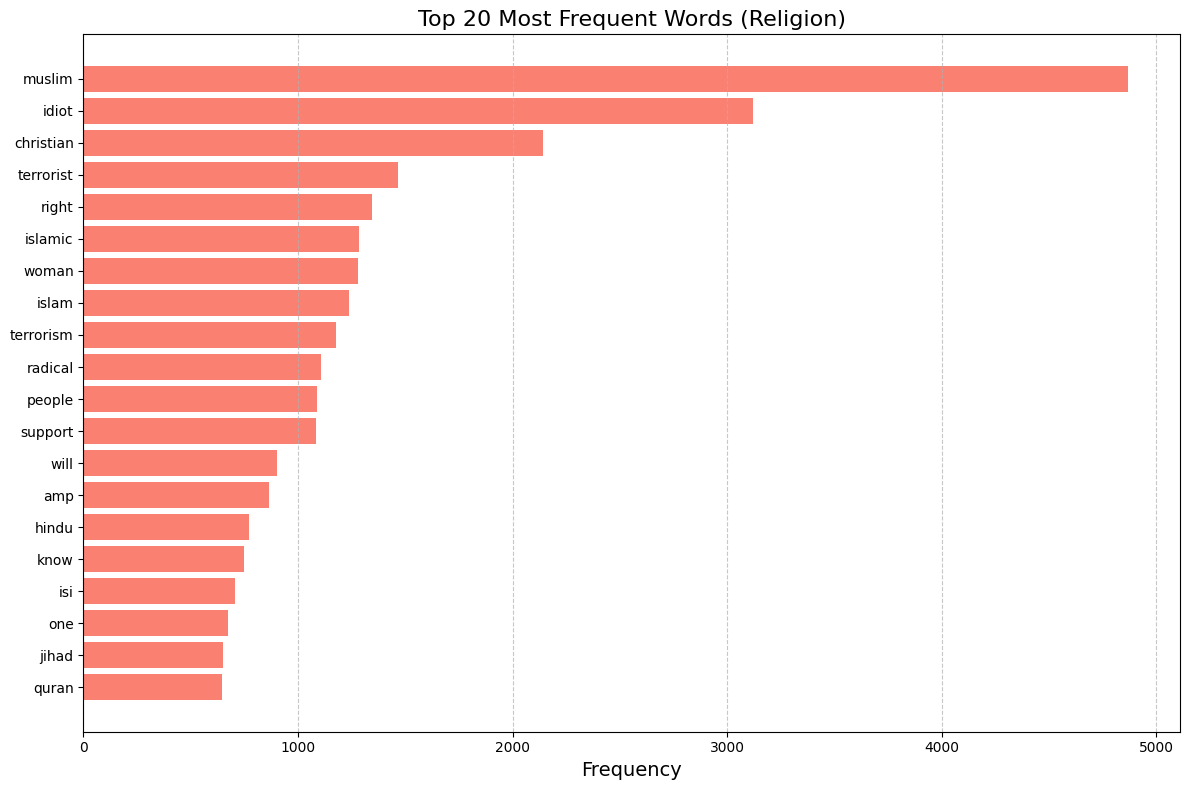

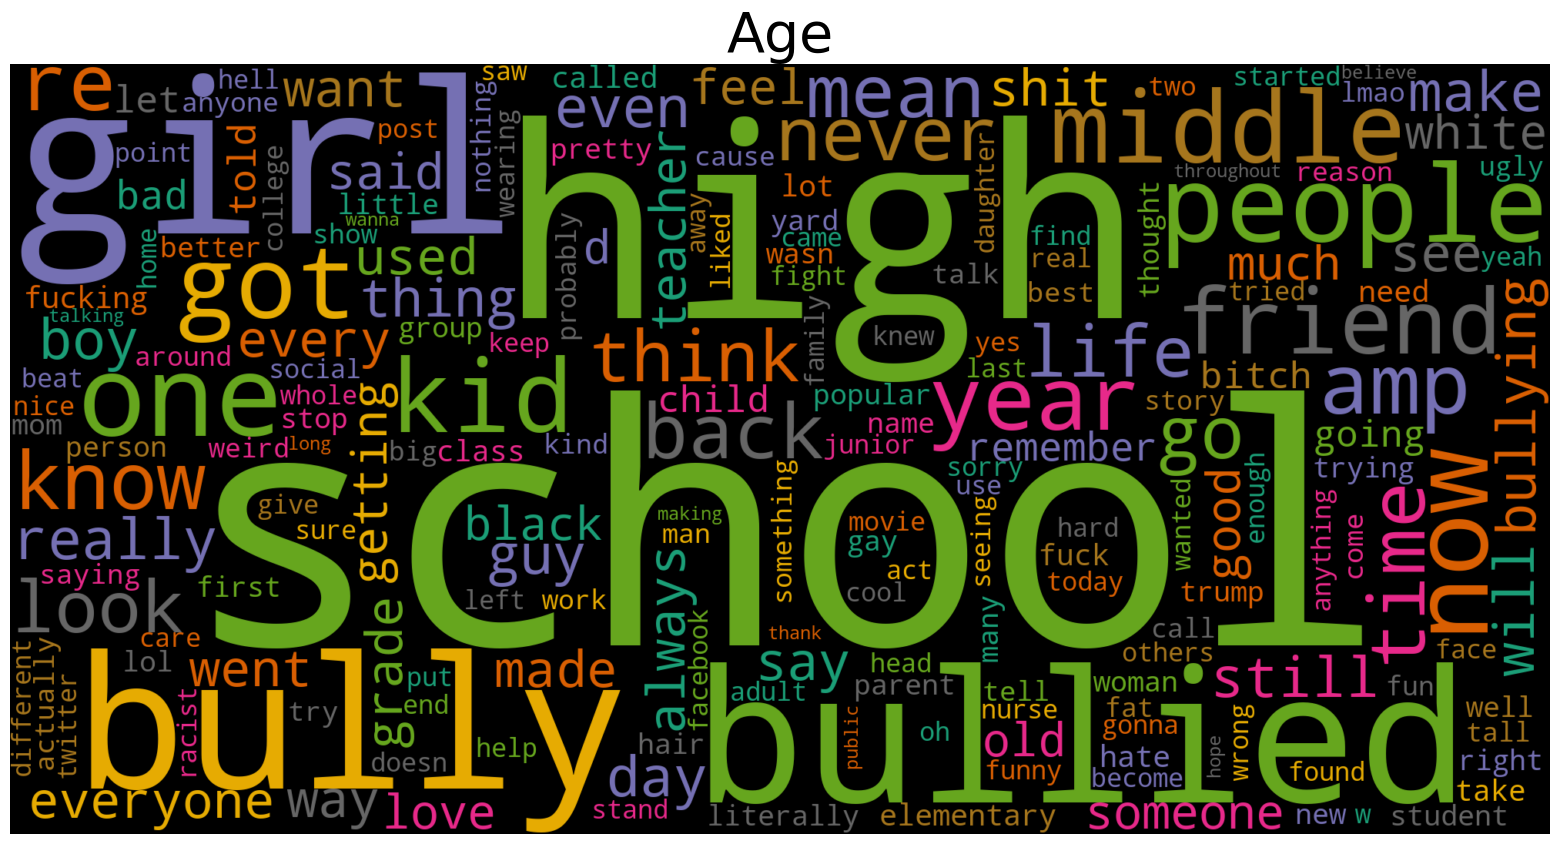

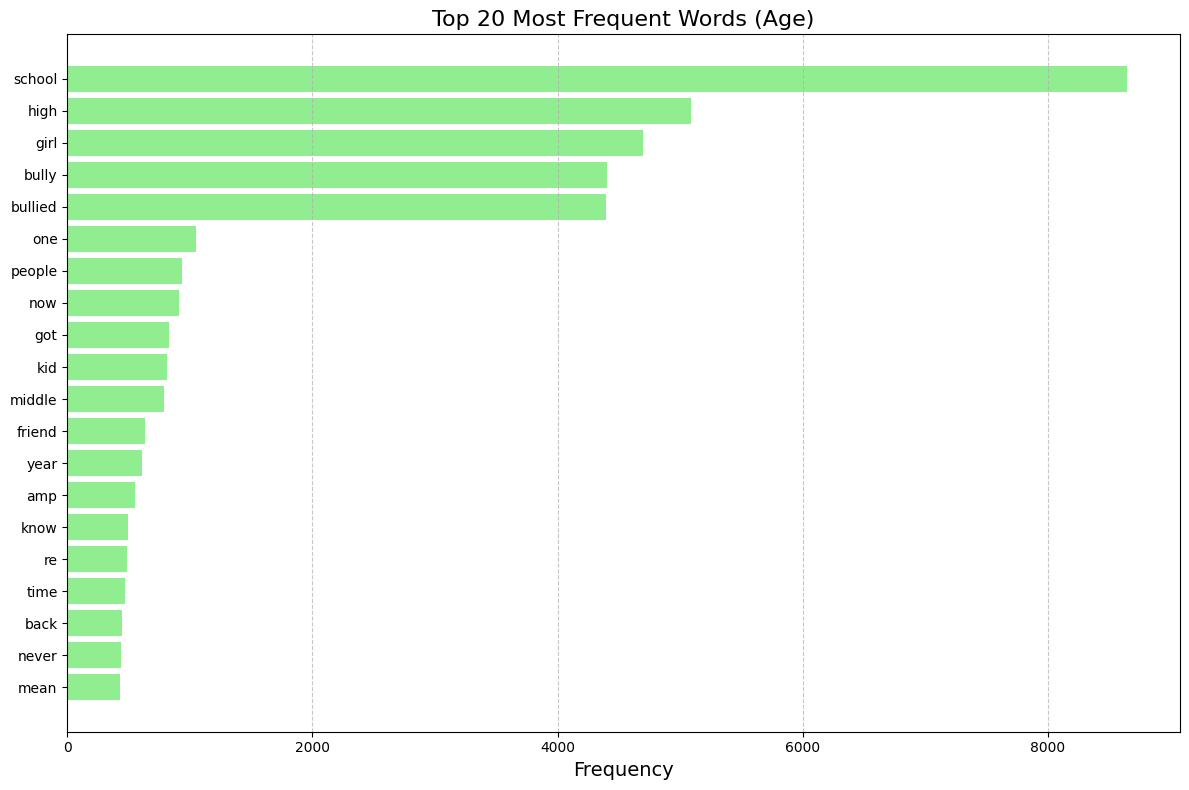

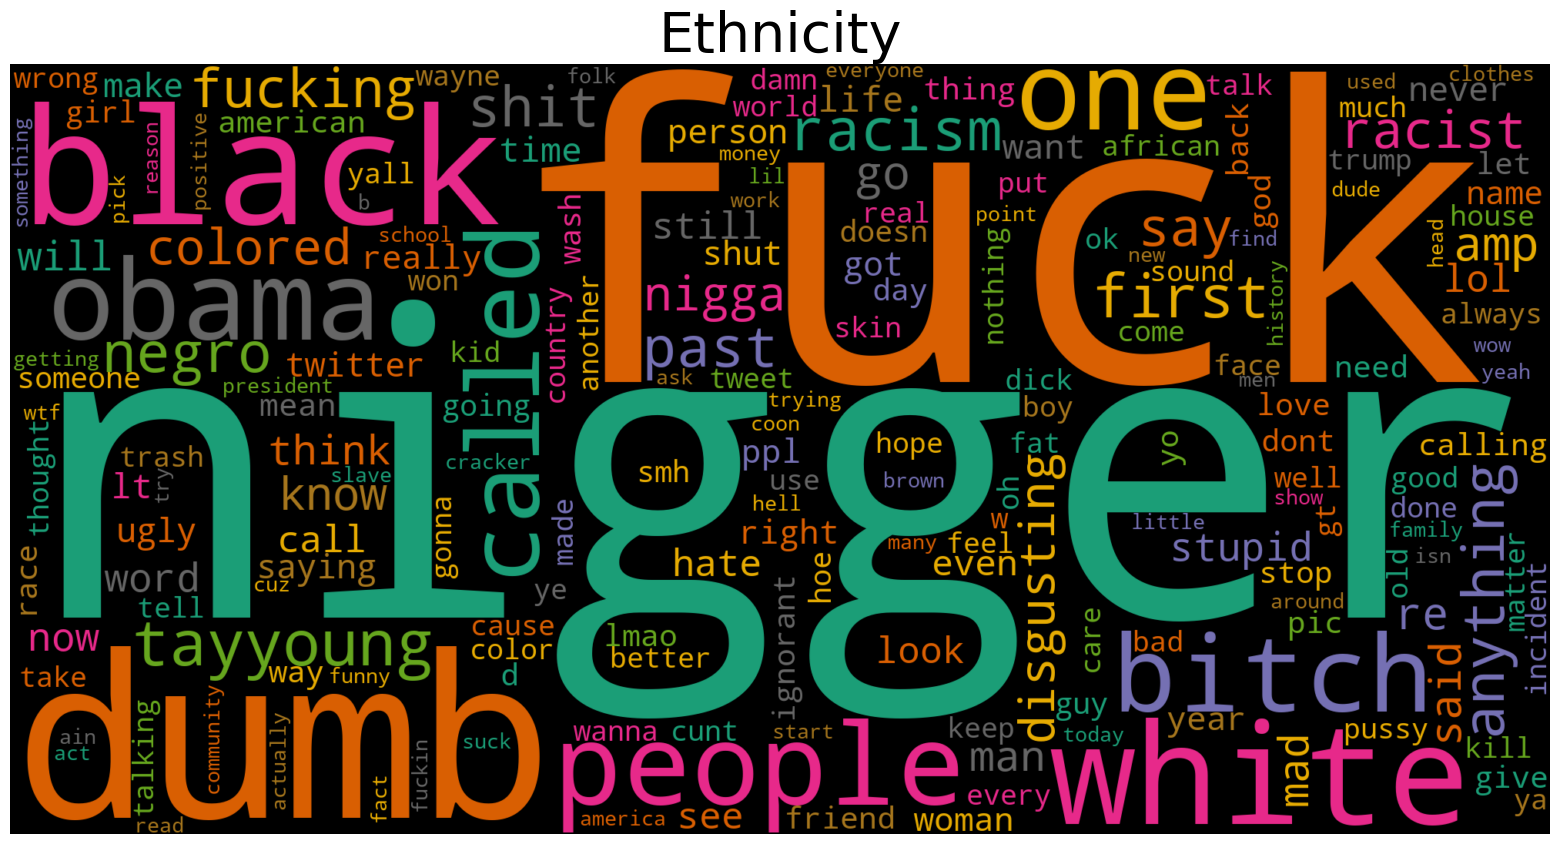

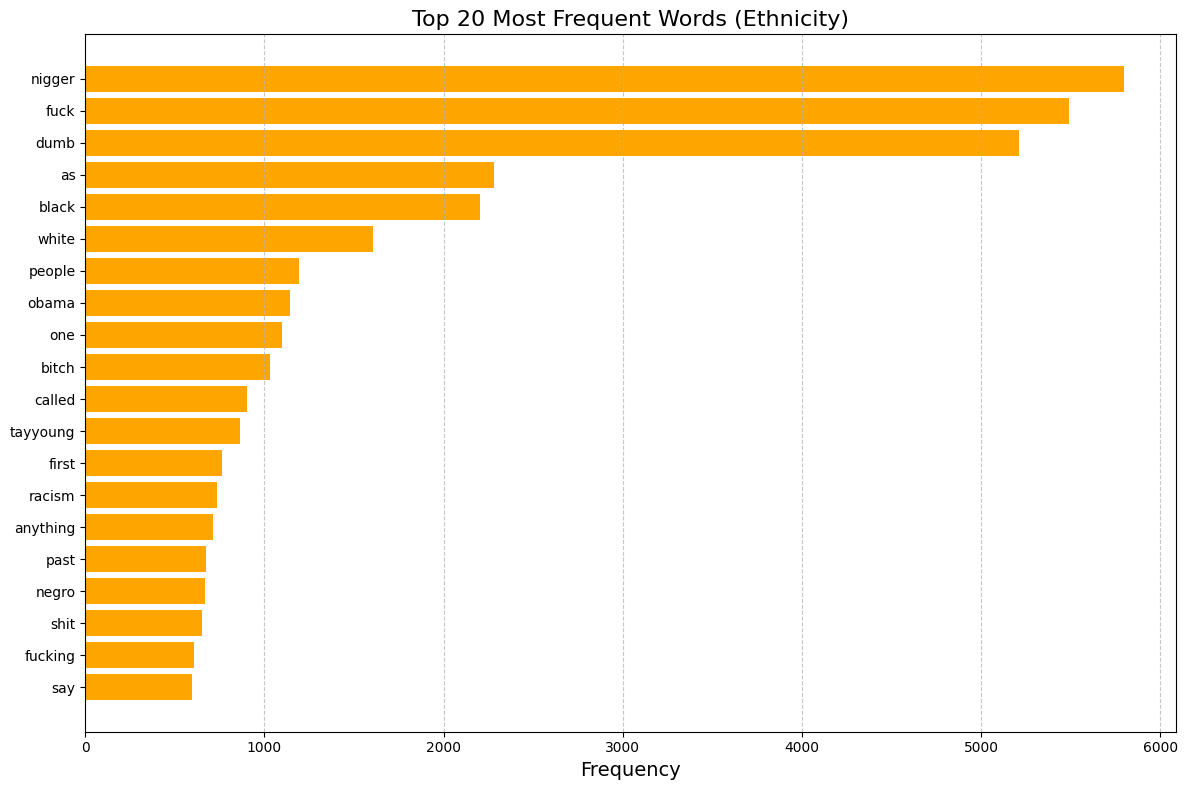

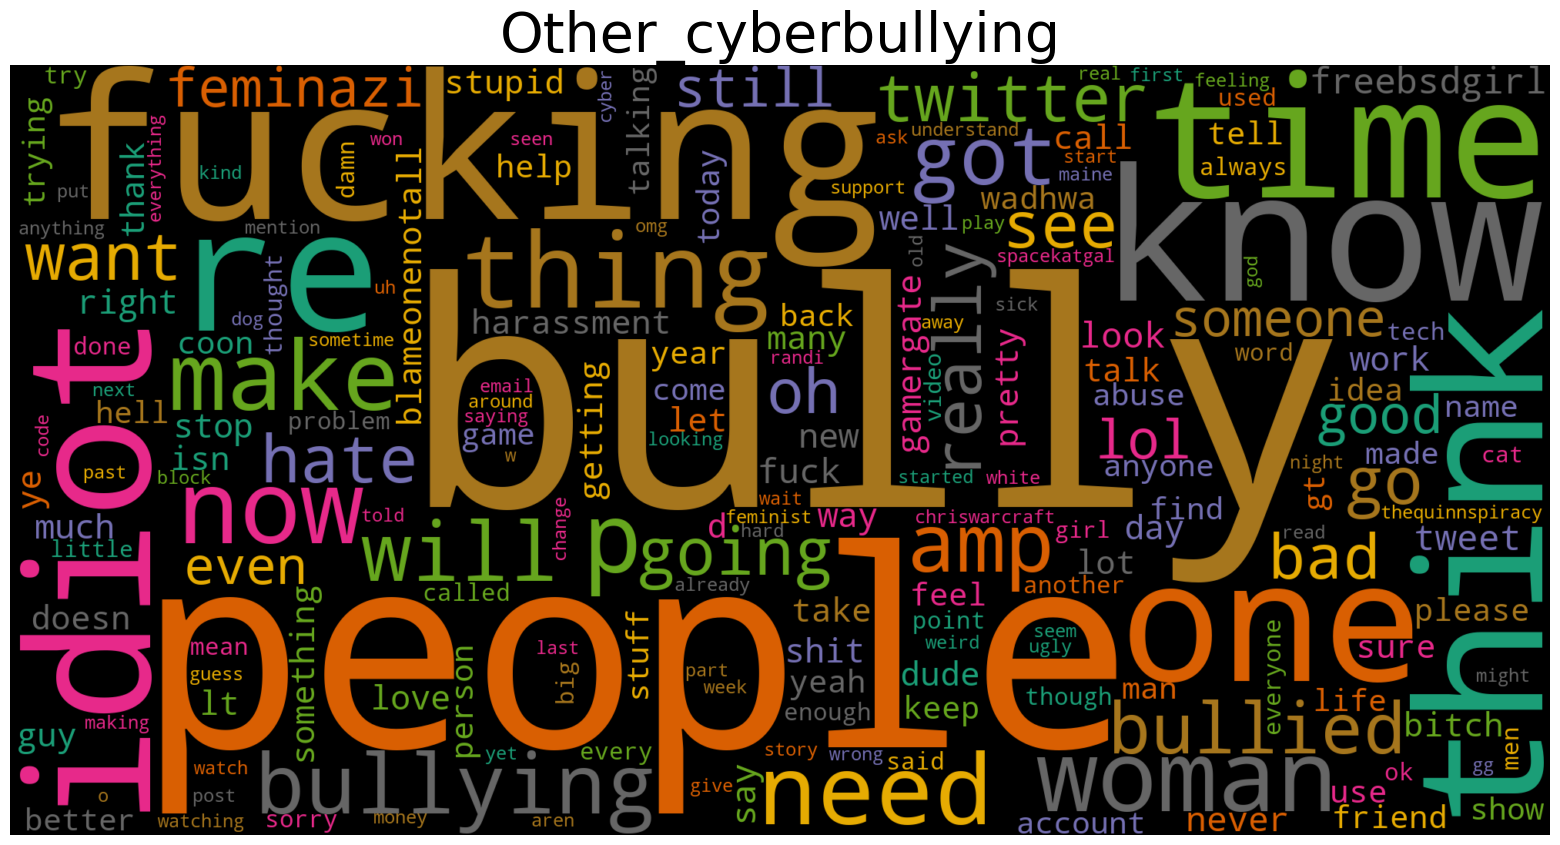

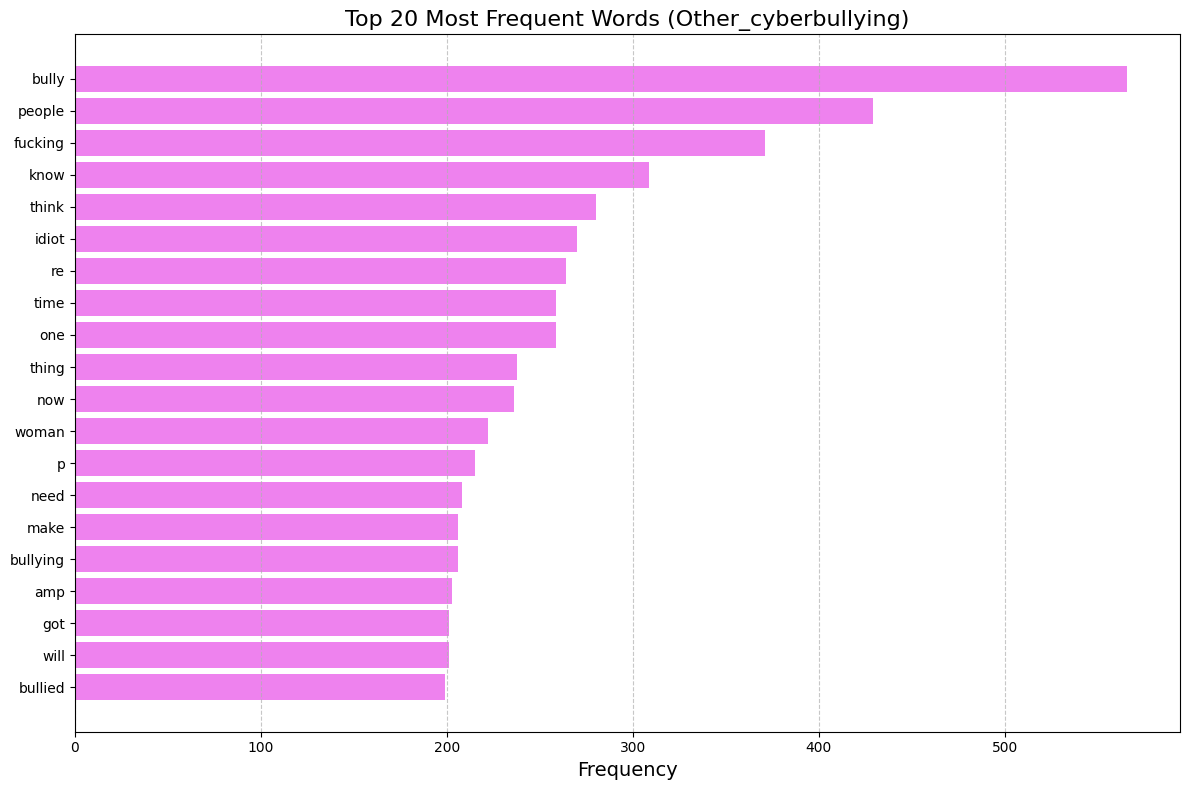

In [ ]:
# Fungsi untuk membersihkan teks dan hitung frekuensi kata
def get_word_frequencies(text_data):
    combined_text = " ".join(text_data).lower()
    words = re.findall(r'\w+', combined_text)  
    return Counter(words)

# Fungsi untuk membuat WordCloud
def plot_wordcloud(text_data, title):
    cloud = WordCloud(
        background_color='black',
        colormap="Dark2",
        collocations=False,
        width=2000,
        height=1000
    ).generate(" ".join(text_data))

    plt.figure(figsize=(20, 10))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=40)
    plt.show()

# Fungsi untuk membuat bar chart frekuensi kata
def plot_word_frequencies(word_freq, title, color='skyblue', top_n=20):
    most_common = word_freq.most_common(top_n)
    df = pd.DataFrame(most_common, columns=['Word', 'Frequency'])

    plt.figure(figsize=(12, 8))
    plt.barh(df['Word'][::-1], df['Frequency'][::-1], color=color)
    plt.xlabel("Frequency", fontsize=14)
    plt.title(title, fontsize=16)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# List kategori dan warna bar chart
categories = {
    'gender': 'skyblue',
    'religion': 'salmon',
    'age': 'lightgreen',
    'ethnicity': 'orange',
    'other_cyberbullying': 'violet'
}

# Iterasi untuk setiap jenis cyberbullying
for category, color in categories.items():
    subset = data[data['cyberbullying_type'] == category]
    text_data = subset.tweet_text.values

    # WordCloud
    plot_wordcloud(text_data, title=category.capitalize())

    # Hitung frekuensi kata dan tampilkan bar chart
    word_freq = get_word_frequencies(text_data)
    plot_word_frequencies(word_freq, title=f"Top 20 Most Frequent Words ({category.capitalize()})", color=color)
